## SED stats & plots

- Read SYNAGE++ results
- Plot SED and models


In [5]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl
from prettytable import PrettyTable


fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

#rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'
rootDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/'

figDir = rootDir+'sedFigs/'

names = ['ToT','ELobe','WLobe','coreBeamPbcorr','coreOutPbcorr']

aut = 'Org'
coreAut = 'Pbcorr'


ToTDir = rootDir+'ToT/'
ELobeDir = rootDir+'ELobe/'
WLobeDir = rootDir+'WLobe/'
#CoreDir = rootDir+'core/'
CoreDir = rootDir+'kore/'

dirNames = [ToTDir,ELobeDir,WLobeDir,CoreDir,CoreDir]

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


**Input flux tables**:

```
~/Projects/MFS/FornaxA/contData/ToT/ToTFluxes.tbl'
~/Projects/MFS/FornaxA/contData/ELobe/ELobeFluxes.tbl'
~/Projects/MFS/FornaxA/contData/WLobe/WLobeFluxes.tbl'
~/Projects/MFS/FornaxA/contData/Core/CoreFluxes.tbl'
```
**Input SYNAGE tables (in synOut directory)**:

```
ToTCI_point1_fit.dat
ToTCIOFF_point1_fit.dat
ToTCI.stats
ToTCIOFF.stats

ELobeCI_point1_fit.dat
ELobeCIOFF_point1_fit.dat
ELobeCI.stats
ELobeCIOFF.stats

WLobeCI_point1_fit.dat
WLobeCIOFF_point1_fit.dat
WLobeCI.stats
WLobeCIOFF.stats

```


In [6]:

for i in xrange(0,len(names)):

    statsCI = syn.readCIStats(dirNames[i]+'synOut/'+names[i]+'CI.stats')
    statsCIOFF =  syn.readCIOFFStats(dirNames[i]+'synOut/'+names[i]+'CIOFF.stats')
  
    #flArr= ascii.read(rootDir+names[i]+'/'+names[i]+'Fluxes.tbl', fast_reader=False)
    #modCI = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CI_point1_fit.dat')
    #modCIOFF = syn.readCIMod(rootDir+names[i]+'/'+names[i]+'CIOFFCore_point1_fit.dat')

    print '''\t+---------+\n\t'''+names[i]+'''\n\t+---------+'''
    
    CI = PrettyTable(['CI', 'value'])
    for key, val in statsCI.items():
        CI.add_row([key, val])


    CIOFF = PrettyTable(['CIOFF', 'value'])
    for key, val in statsCIOFF.items():
        CIOFF.add_row([key, val])

    print CI, CIOFF

    if i == 0:
        TotStatsCI = statsCI.copy()
        TotStatsCIOFF = statsCIOFF.copy()
    elif i ==1:
        ELobeStatsCI = statsCI.copy()
        ELobeStatsCIOFF = statsCIOFF.copy()    
    elif i == 2:
        WLobeStatsCI = statsCI.copy()
        WLobeStatsCIOFF = statsCIOFF.copy()
    elif i ==3:
        CoreStatsCI = statsCI.copy()
        CoreStatsCIOFF = statsCIOFF.copy()
    elif i ==4:
        OutStatsCI = statsCI.copy()
        OutStatsCIOFF = statsCIOFF.copy() 
        
print '''\t+---------+\n\t Synage results read\n\t+---------+'''


	+---------+
	ToT
	+---------+
+--------------+-------------+
|      CI      |    value    |
+--------------+-------------+
| alpha_errsup |  0.0148768  |
|    break     |   8486.768  |
|    chisq     |   142.7609  |
|    chired    |   6.79814   |
|  break_inf   |  -3448.562  |
|    alpha     |  0.5992362  |
|     ndf      |     21.0    |
| alpha_errinf | -0.04706181 |
|     norm     |   40.01438  |
|  break_sup   |   1522.012  |
+--------------+-------------+ +--------------+-------------+
|    CIOFF     |    value    |
+--------------+-------------+
|   t_errinf   |  -0.1081718 |
|    tratio    |  0.1563096  |
|   t_errsup   |  0.07508129 |
|    break     |   13388.77  |
|    chisq     |   129.5535  |
|    alpha     |  0.5919301  |
| alpha_errinf | -0.08630837 |
| alpha_errsup |  0.03700102 |
|    chired    |   6.477676  |
|     ndf      |     20.0    |
|  break_inf   |   -8681.03  |
|  break_sup   |   4377.127  |
|     norm     |   29.68218  |
+--------------+-------------+
	+------

In [7]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms

def plot_CI_over_CIOFF(tot,mod_CI,mod_CIOFF,statsCI,statsCIOFF,labe,color_plot,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(mod_CI[0] - 5e5)).argmin()
    idx_min = (np.abs(mod_CI[0] - 30)).argmin()
    totplot = ax1.errorbar(tot['Frequency [MHz]'],tot['Integrated Flux [Jy]'], yerr=tot['Error [Jy]'],
             marker='o', color=color_plot[0], linestyle=' ',label=labe,capsize=6) 
    
    ax1.plot(mod_CI[0][idx_min:idx_max],mod_CI[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[1], linestyle=':',label='CI',alpha=0.5)

    idx_br = (np.abs(mod_CI[0] - float(statsCI['break']))).argmin()
    ax1.axvline(statsCI['break'],ymin=0,ymax=0.58,ls=':',c=color_plot[1],lw=2,alpha=0.5)

    ax1.plot(mod_CIOFF[0][idx_min:idx_max],mod_CIOFF[1][idx_min:idx_max],lw=3, marker=' ', 
             color=color_plot[2], linestyle='--',label=r'CI$_{\rm OFF}$',alpha=0.5)

    idx_br = (np.abs(mod_CIOFF[0] - float(statsCIOFF['break']))).argmin()
    ax1.axvline(statsCIOFF['break'],ymin=0,ymax=0.55,ls='--',c=color_plot[2],lw=2,alpha=0.5)
    


    totplot[-1][0].set_linestyle('--')
    totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


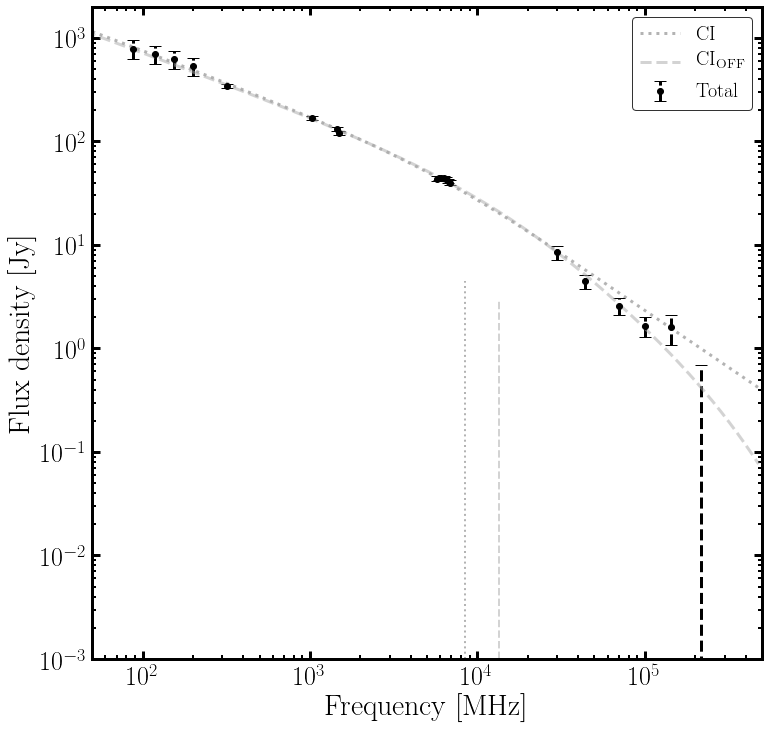

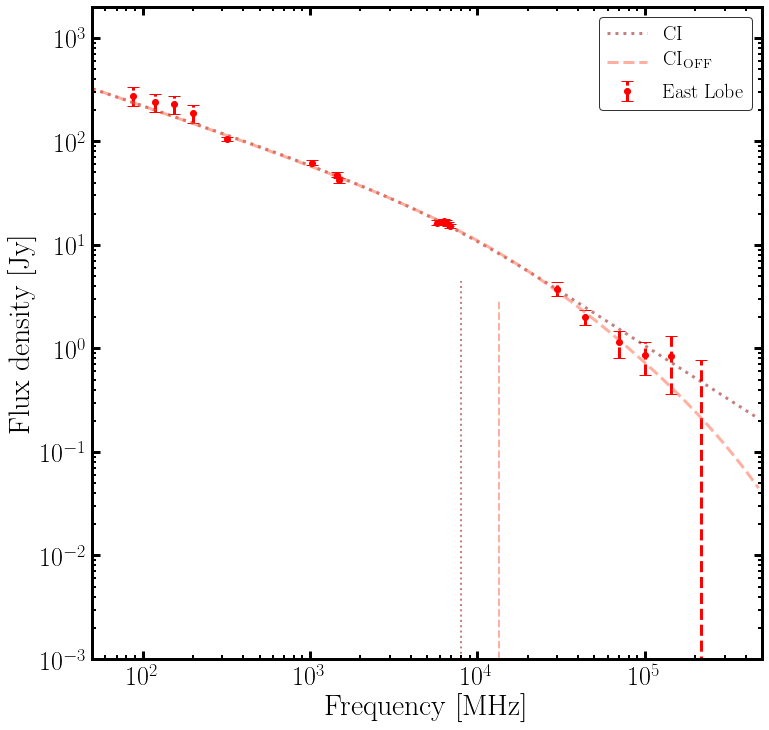

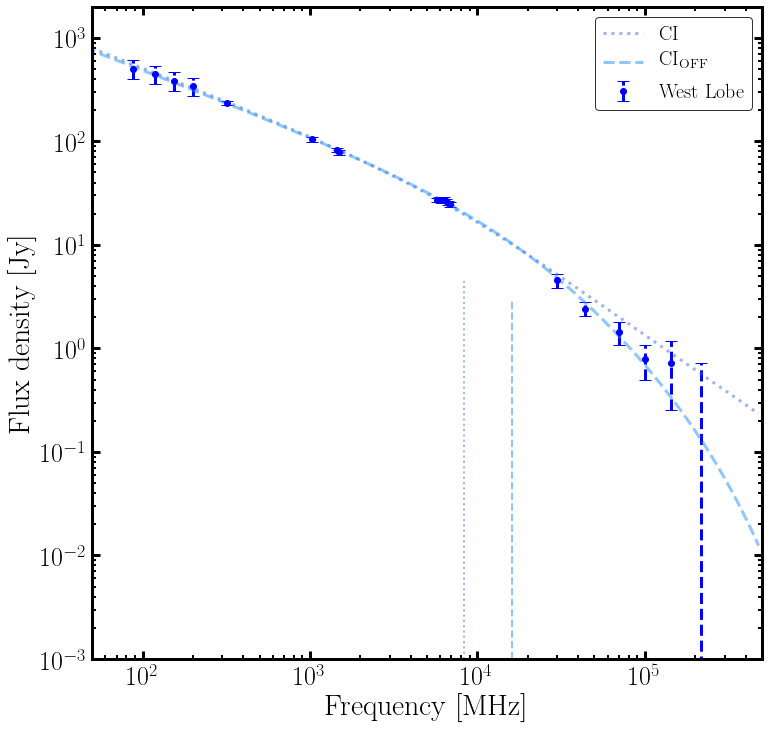

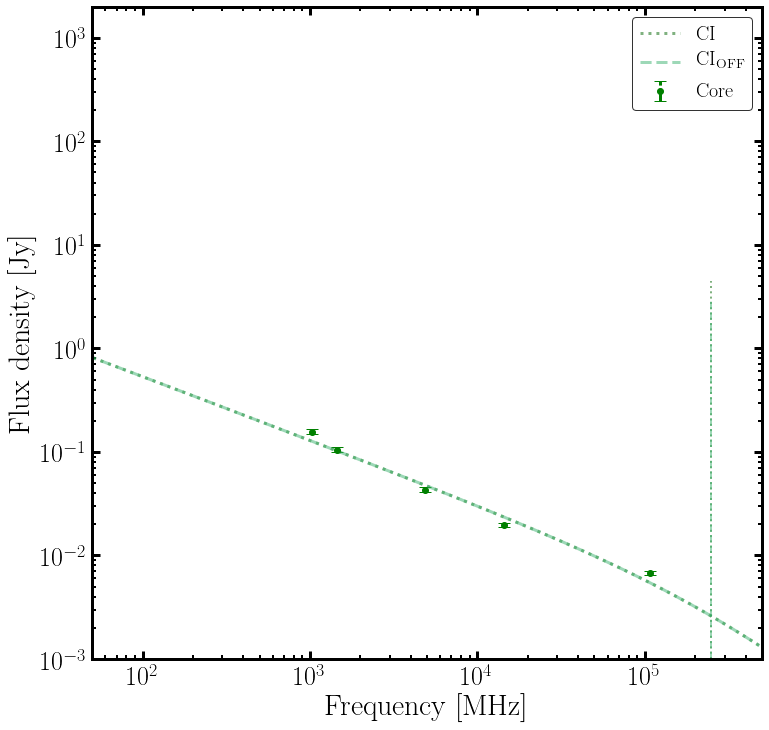

In [9]:
ToT= ascii.read(ToTDir+'ToTFluxes.tbl', fast_reader=False)
TotModCI = syn.readCIMod(ToTDir+'synOut/ToTCI_point1_fit.dat')
TotModCIOFF = syn.readCIMod(ToTDir+'synOut/ToTCIOFF_point1_fit.dat')
        
ELobe= ascii.read(ELobeDir+'ELFluxes.tbl', fast_reader=False)
ELobeModCI = syn.readCIMod(ELobeDir+'synOut/ELobeCI_point1_fit.dat')
ELobeModCIOFF = syn.readCIMod(ELobeDir+'synOut/ELobeCIOFF_point1_fit.dat')

WLobe= ascii.read(WLobeDir+'WLFluxes.tbl', fast_reader=False)
WLobeModCI = syn.readCIMod(WLobeDir+'synOut/WLobeCI_point1_fit.dat')
WLobeModCIOFF = syn.readCIMod(WLobeDir+'synOut/WLobeCIOFF_point1_fit.dat')

Core= ascii.read(CoreDir+'outTabs/coreFluxBeam'+coreAut+'.tbl', fast_reader=False)
CoreModCI = syn.readCIMod(CoreDir+'synOut/coreBeam'+coreAut+'CI_point1_fit.dat')
CoreModCIOFF = syn.readCIMod(CoreDir+'synOut/coreBeam'+coreAut+'CIOFF_point1_fit.dat')

Out= ascii.read(CoreDir+'outTabs/coreFluxOut'+coreAut+'.tbl', fast_reader=False)
OutModCI = syn.readCIMod(CoreDir+'synOut/coreOut'+coreAut+'CI_point1_fit.dat')
OutModCIOFF = syn.readCIMod(CoreDir+'synOut/coreOut'+coreAut+'CIOFF_point1_fit.dat')

outplot=figDir+'ToT_CICIOFF'+aut+'.png'
plot_CI_over_CIOFF(ToT,TotModCI,TotModCIOFF,TotStatsCI,TotStatsCIOFF,'Total',['black','dimgrey','darkgrey'],outplot)

outplot=figDir+'ELobe_CICIOFF'+aut+'.png'
plot_CI_over_CIOFF(ELobe,ELobeModCI,ELobeModCIOFF,ELobeStatsCI,ELobeStatsCIOFF,'East Lobe',['red','darkred','tomato'],outplot)

outplot=figDir+'WLobe_CICIOFF'+aut+'.png'
plot_CI_over_CIOFF(WLobe,WLobeModCI,WLobeModCIOFF,WLobeStatsCI,WLobeStatsCIOFF,'West Lobe',['blue','royalblue','dodgerblue'],outplot)

outplot=figDir+'Core_CICIOFF'+aut+'.png'
plot_CI_over_CIOFF(Core,CoreModCI,CoreModCIOFF,CoreStatsCI,CoreStatsCIOFF,'Core',['green','darkgreen','mediumseagreen'],outplot)


In [10]:
def plot_SED(ToT,ELobe,WLobe,Core,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    TotPlot = ax1.errorbar(ToT['Frequency [MHz]'],ToT['Integrated Flux [Jy]'], yerr=ToT['Error [Jy]'],
             marker='o', color='black', linestyle=' ',label='Total',capsize=6,markersize=10,) 
    TotPlot[-1][0].set_linestyle('--')
    TotPlot[-1][0].set_linewidth(3)
    
    ELobePlot = ax1.errorbar(ELobe['Frequency [MHz]'],ELobe['Integrated Flux [Jy]'], yerr=ELobe['Error [Jy]'],
             marker='o', color='red', linestyle=' ',label='East Lobe',capsize=6,markersize=10) 
    ELobePlot[-1][0].set_linestyle('--')
    ELobePlot[-1][0].set_linewidth(3)
    
    WLobePlot = ax1.errorbar(WLobe['Frequency [MHz]'],WLobe['Integrated Flux [Jy]'], yerr=WLobe['Error [Jy]'],
             marker='o', color='blue', linestyle=' ',label='West Lobe',capsize=6,markersize=10) 
    WLobePlot[-1][0].set_linestyle('--')
    WLobePlot[-1][0].set_linewidth(3)
    
    #CorePlot = ax1.errorbar(Core['Frequency [MHz]'],Core['Integrated Flux [Jy]'], yerr=Core['Error [Jy]'],
     #$        marker='o', color='green', linestyle=' ',label='Core',capsize=6) 
    #CorePlot[-1][0].set_linestyle('--')
    #CorePlot[-1][0].set_linewidth(3)



    #totplot[-1][0].set_linestyle('--')
    #totplot[-1][0].set_linewidth(3)    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 30})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)

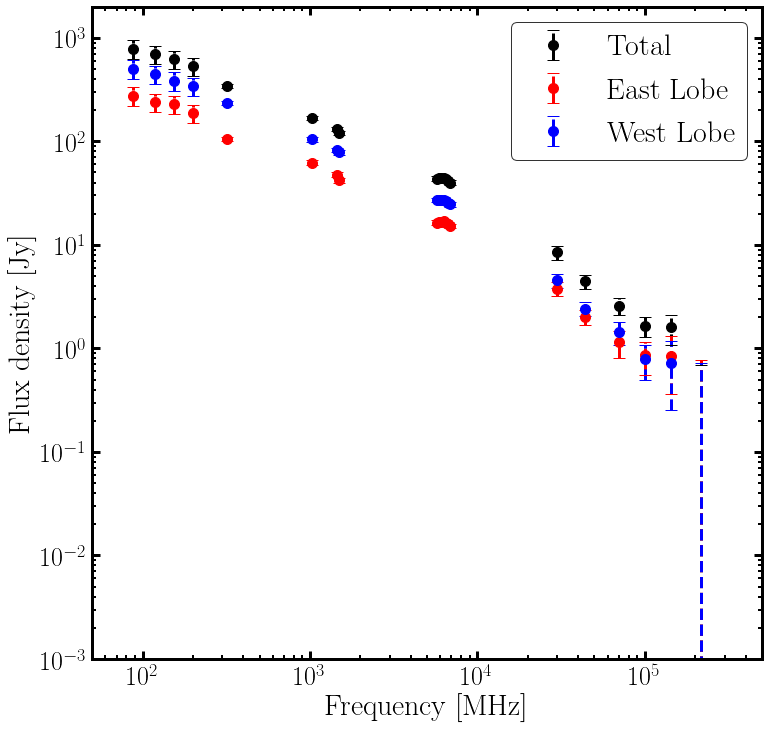

In [11]:
outplot=figDir+'SED_All'+aut+'.png'
plot_SED(ToT,ELobe,WLobe,Core,outplot)

In [12]:
#-------------------------------------------------#
# Plot SED
#-------------------------------------------------#

def plotAllOver(tot1,mod1,stats1,tot2,mod2,stats2,tot3,mod3,stats3,tot4,mod4,stats4,sed):

    params = {'font.family'         :' serif',
              'font.style'          : 'normal',
              'font.weight'         : 'book',
              'font.size'           : 30.0,
              'axes.linewidth'      : 3,
              'lines.linewidth'     : 3,
              'xtick.labelsize'     : 26,
              'ytick.labelsize'     : 26, 
              'xtick.direction'     :'in',
              'ytick.direction'     :'in',
              'xtick.top'           : True,   # draw ticks on the top side
              'xtick.bottom'        : True,   # draw ticks on the bottom side    
              'ytick.left'          : True,   # draw ticks on the top side
              'ytick.right'         : True,   # draw ticks on the bottom side  
              'xtick.major.size'    : 8,
              'xtick.major.width'   : 3,
              'xtick.minor.size'    : 4,
              'xtick.minor.width'   : 2,
              'ytick.major.size'    : 8,
              'ytick.major.width'   : 3,
              'ytick.minor.size'    : 4,
              'ytick.minor.width'   : 2, 
              'text.usetex'         : True,
              'text.latex.unicode'  : True
               }
    plt.rcParams.update(params)

    # initialize figure
    fig = plt.figure(figsize =(12,12))
    fig.subplots_adjust(hspace=0.0)
    gs = gridspec.GridSpec(1, 1)
    plt.rc('xtick')


    # Initialize subplots
    ax1 = fig.add_subplot(gs[0])
    ax1.set_xlabel(r'Frequency [MHz]')
    ax1.set_ylabel(r'Flux density [Jy]')
    #ax1.set_xscale("symlog", nonposx='clip', linthreshy=0.1)
    #ax1.set_yscale("symlog", nonposy='clip', linthreshy=0.1)
    ax1.set_xscale("log", nonposx='clip')
    ax1.set_yscale("log", nonposy='clip')
    ax1.set_ylim([1e-3,2e3])
    ax1.set_xlim([50,5e5])
    ax1.tick_params(axis='both', which='major', pad=5)
    
    # MODELS
    
    idx_max = (np.abs(mod1[0] - 5e5)).argmin()
    idx_min = (np.abs(mod1[0] - 30)).argmin()
    
    totplot1 = ax1.errorbar(tot1['Frequency [MHz]'],tot1['Integrated Flux [Jy]'], yerr=tot1['Error [Jy]'],
             marker='o', color='red', linestyle=' ',label='East Lobe',capsize=6,markersize=10) 
    
    ax1.plot(mod1[0][idx_min:idx_max],mod1[1][idx_min:idx_max],lw=3, marker=' ', 
             color='red', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod1[0] - float(stats1['break']))).argmin()
    #ax1.axvline(stats1['break'],ymin=0,ymax=0.58,ls=':',c='red',lw=3,alpha=0.8)
    
    totplot1[-1][0].set_linestyle('--')
    totplot1[-1][0].set_linewidth(3)    
    
    totplot2 = ax1.errorbar(tot2['Frequency [MHz]'],tot2['Integrated Flux [Jy]'], yerr=tot2['Error [Jy]'],
             marker='o', color='blue', linestyle=' ',label='West Lobe',capsize=6,markersize=10) 
    
    idx_max = (np.abs(mod2[0] - 5e5)).argmin()
    idx_min = (np.abs(mod2[0] - 30)).argmin()    
    ax1.plot(mod2[0][idx_min:idx_max],mod2[1][idx_min:idx_max],lw=3, marker=' ', 
             color='blue', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod2[0] - float(stats2['break']))).argmin()
    #ax1.axvline(stats2['break'],ymin=0,ymax=0.58,ls=':',c='blue',lw=3,alpha=0.8)
    
    totplot2[-1][0].set_linestyle('--')
    totplot2[-1][0].set_linewidth(3)      
    
    totplot3 = ax1.errorbar(tot3['Frequency [MHz]'],tot3['Integrated Flux [Jy]'], yerr=tot3['Error [Jy]'],
             marker='o', color='green', linestyle=' ',label='Core',capsize=6,markersize=10) 
    
    idx_max = (np.abs(mod3[0] - 5e5)).argmin()
    idx_min = (np.abs(mod3[0] - 10)).argmin()    
    ax1.plot(mod3[0][idx_min:idx_max],mod3[1][idx_min:idx_max],lw=3, marker=' ', 
            color='green', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod3[0] - float(stats3['break']))).argmin()
    #ax1.axvline(stats3['break'],ymin=0,ymax=0.58,ls=':',c='green',lw=3,alpha=0.8)
    
    totplot3[-1][0].set_linestyle('--')
    totplot3[-1][0].set_linewidth(3) 
    
    idx_max = (np.abs(mod4[0] - 5e5)).argmin()
    idx_min = (np.abs(mod4[0] - 10)).argmin()    
   
    totplot4 = ax1.errorbar(tot4['Frequency [MHz]'],tot4['Integrated Flux [Jy]'], yerr=tot4['Error [Jy]'],
             marker='o', color='m', linestyle=' ',label='Jets',capsize=6,markersize=10) 
    
    ax1.plot(mod4[0][idx_min:idx_max],mod4[1][idx_min:idx_max],lw=3, marker=' ', 
            color='m', linestyle=':',label='',alpha=0.5)

    idx_br = (np.abs(mod4[0] - float(stats4['break']))).argmin()
    #ax1.axvline(stats4['break'],ymin=0,ymax=0.58,ls=':',c='m',lw=3,alpha=0.8)
    
    totplot4[-1][0].set_linestyle('--')
    totplot4[-1][0].set_linewidth(3) 
    
    #ax1.axvline(br_f_no217,ymin=0,ymax=0.73,ls='-.',c='cyan',lw=1) 

    legend = plt.legend(loc=1, prop={'size': 20})
    legend.get_frame().set_edgecolor('black')

    # Save figure to file
    plt.savefig(sed,overwrite = True)


print '\n\t-----> Loaded <-----'


	-----> Loaded <-----


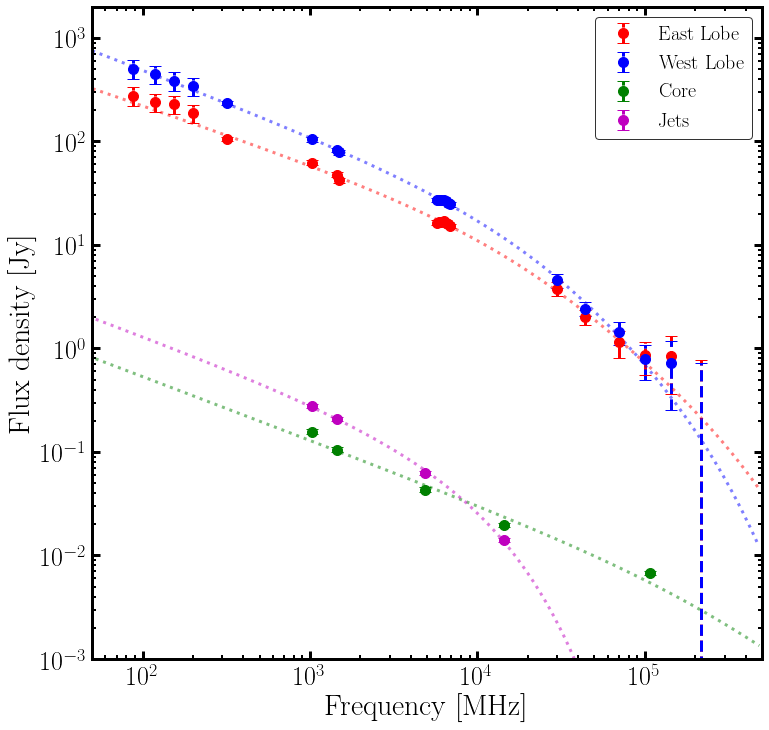

In [13]:
outplot=figDir+'ModAll'+aut+'PbCorr.png'
plotAllOver(ELobe,ELobeModCIOFF,ELobeStatsCIOFF,WLobe,WLobeModCIOFF,WLobeStatsCIOFF,
         Core,CoreModCI,CoreStatsCI,Out,OutModCIOFF,OutStatsCIOFF,outplot)